# Task 2
1. For dataset “Babyboom”:
   - Test a weight of babies for normality. First, for the whole dataset, then for group of boys and girls independently.
   - Test the hypothesis if the mean of the weight of girls is the same as the weight of boys.
   - Test the hypothesis if the variance of the weight of girls is the same as the weight of boys.
   - Test the hypothesis if the time between birthtime is distributed by exponential distribution.
   - Test the hypothesis if the births per hour for each hour is distributed by Poisson distribution.

2. For dataset “Euroweight”:
   - Test the weight of coins for normality (all coins and coins in packages).
   - Test the hypotheses that the mean of the weight of coins is the same in different packages.

3. For dataset “iris.txt” (read description in file “iris_description.txt’):
   - Test the normality of length of flowers grouping them by the type of iris.
   - Test the hypotheses about similarity of distributions of characteristics of flowers of different types.
   - Test the hypotheses if the means and variances of the characteristics of flowers of different types are equal.

4. For dataset “height.xls”:
   - Test the normality of heights of football and basketball players.
   - Test the equity of means and variances of the heights of football and basketball players.
   - Test if the distributions of the heights of football and basketball players are the same.

5. For dataset “sugery.xlsx”:
   - Test the hypothesis that the operation is successful with probability 0.7. By success we mean that “V right” before operation is less than “V right” after operation and at the same time “V left” before operation is less than “V left” after operation.


# Babyboom
-----------------------------------------------------------
VARIABLE DESCRIPTIONS: 

Columns:
 - 1 -  8  Time of birth recorded on the 24-hour clock
 - 9 - 16  Sex of the child (1 = girl, 2 = boy)
- 17 - 24  Birth weight in grams
- 25 - 32  Number of minutes after midnight of each birth
-----------------------------------------------------------


1. For dataset “Babyboom”:
   - Test a weight of babies for normality. First, for the whole dataset, then for group of boys and girls independently.
   - Test the hypothesis if the mean of the weight of girls is the same as the weight of boys.
   - Test the hypothesis if the variance of the weight of girls is the same as the weight of boys.
   - Test the hypothesis if the time between birthtime is distributed by exponential distribution.
   - Test the hypothesis if the births per hour for each hour is distributed by Poisson distribution.


In [2]:
file_path <- "../data/babyboom.dat.txt"
babyboom = read.table(file_path,  sep = "", fill = TRUE )

# fill = True -- na в пустые колонки

# Задание названий столбцов
colnames(babyboom) <- c("birth", "gender", "weight", "minutes")

babyboom$gender = factor(babyboom$gender, labels = c("girl", "boy"))


head(babyboom, 3)
tail(babyboom, 2)

,birth,gender,weight,minutes
,<int>,<fct>,<int>,<int>
1,5,girl,3837,5
2,104,girl,3334,64
3,118,boy,3554,78


,birth,gender,weight,minutes
,<int>,<fct>,<int>,<int>
43,2327,girl,3542,1407
44,2355,girl,3278,1435


## Check Normality oh weight of babies (for both boys and girls, for boys and for girls separately)
    1. Visual checking (density and histogram)
    2. QQ - plot
    3. Shapiro-Wilk test
    4. Kolmogorov-Simrnov test 
    5. Peasron 

### 1. Visual checking (density and histogram)

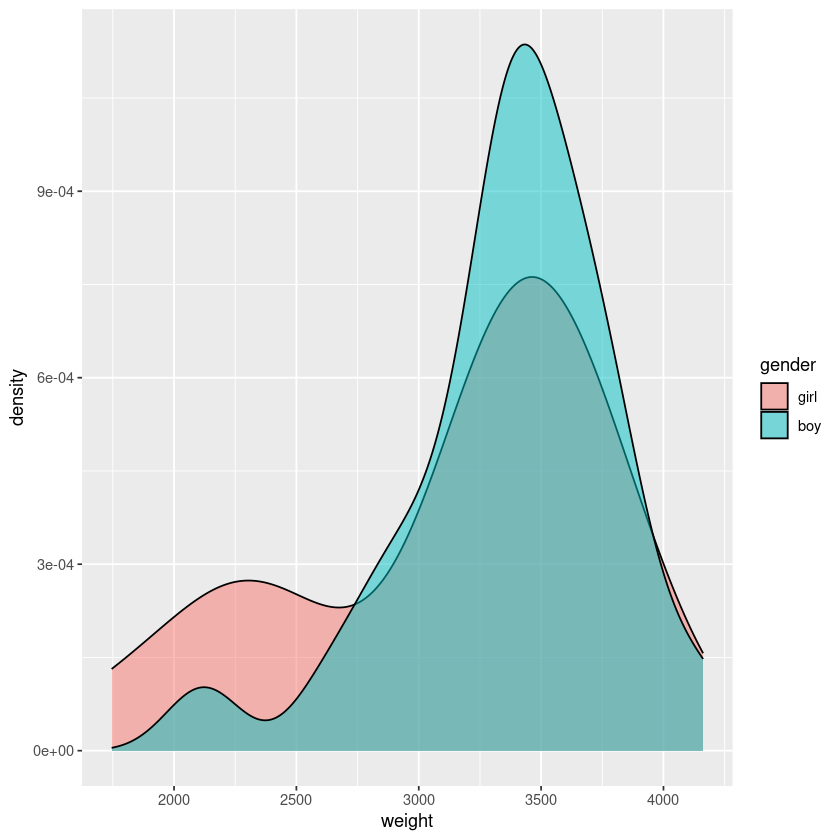

In [3]:
library(ggplot2)
ggplot(babyboom, aes(x = weight, fill = gender))+
    geom_density( alpha = 0.5)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


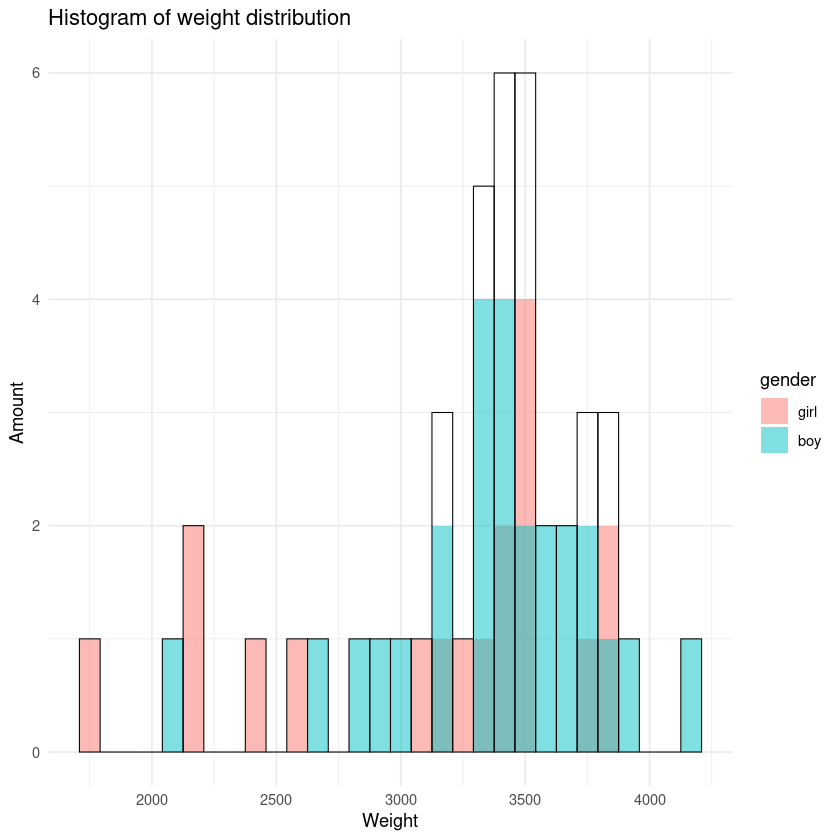

In [97]:
library(ggplot2)

# Создаем гистограмму с количеством минут по гендеру
ggplot(babyboom, aes(x = weight, fill = gender)) +
    geom_histogram(aes(y = after_stat(count)), position = "identity", alpha = 0.5) +  # Гистограмма по гендеру
    geom_histogram(aes(y = after_stat(count)), color = "black", linewidth = 0.3, 
                   fill = NA,data = babyboom) +  # Общая гистограмма
    labs(title = "Histogram of weight distribution",
         x = "Weight",
         y = "Amount") +
    theme_minimal()




### 2. QQ - plot

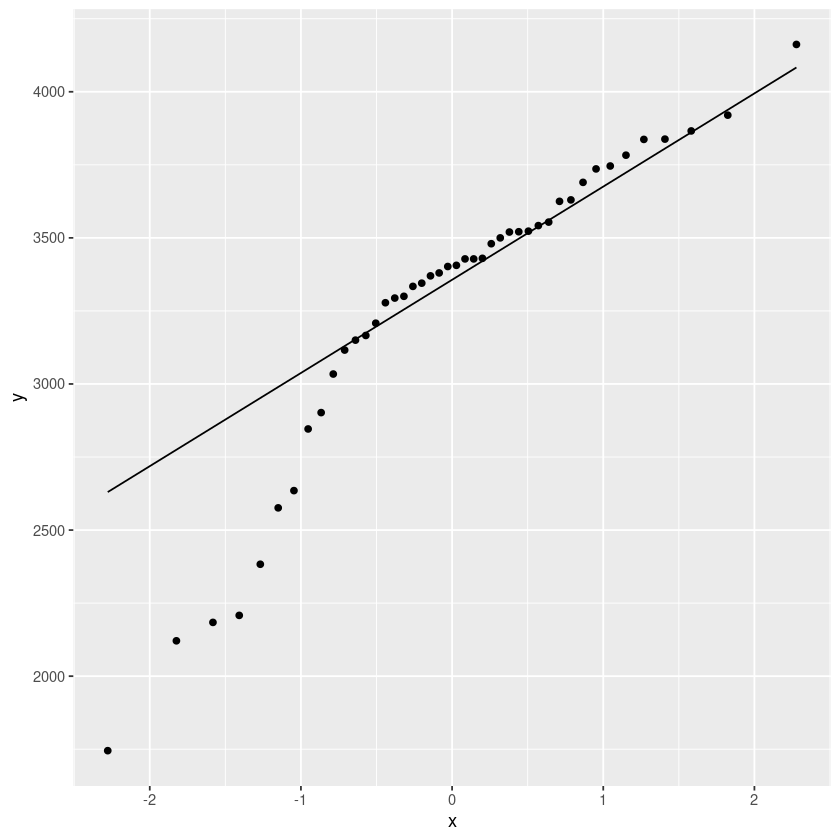

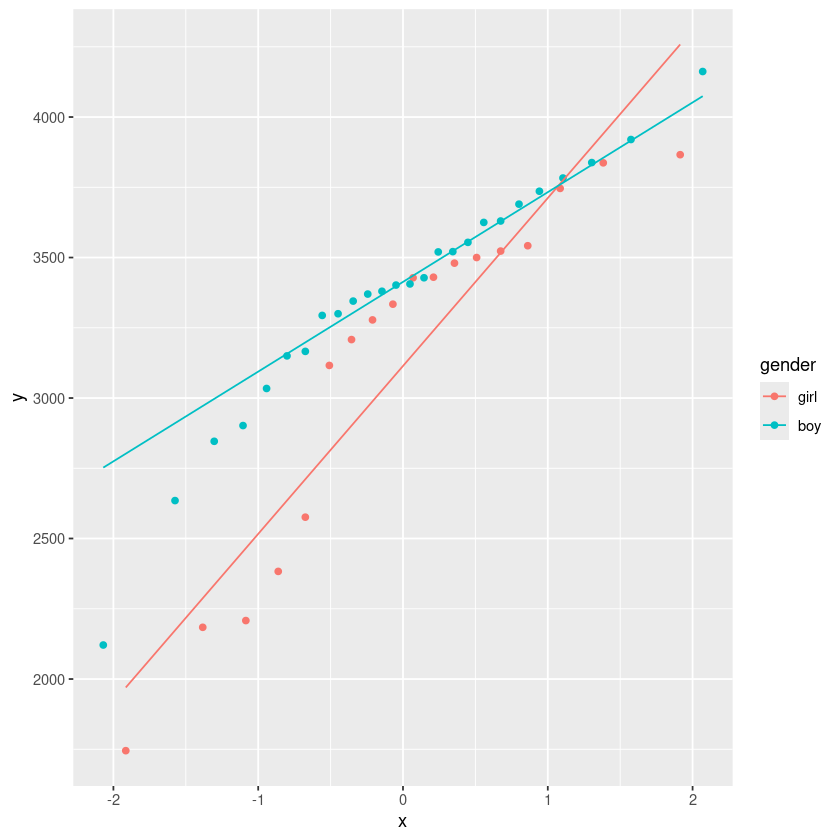

In [5]:
library(ggplot2)
ggplot(babyboom, aes(sample=weight))+
    stat_qq()+
    stat_qq_line() # norm

ggplot(babyboom, aes(sample=weight, color = gender))+
    stat_qq()+
    stat_qq_line() # norm


### 3. Shapiro-Wilk test

In [6]:
# Shapiro-wilk
shapiro_test_result_for_all = shapiro.test(babyboom$weight)
print(shapiro_test_result_for_all)

# Shapiro-wilk
shapiro_test_result_for_boys = shapiro.test(subset(babyboom, gender == "boy")$weight)
print(shapiro_test_result_for_boys)

# Shapiro-wilk
shapiro_test_result_for_girls = shapiro.test(subset(babyboom, gender == "girl")$weight)
print(shapiro_test_result_for_girls)


	Shapiro-Wilk normality test

data:  babyboom$weight
W = 0.89872, p-value = 0.0009944


	Shapiro-Wilk normality test

data:  subset(babyboom, gender == "boy")$weight
W = 0.94747, p-value = 0.2022


	Shapiro-Wilk normality test

data:  subset(babyboom, gender == "girl")$weight
W = 0.87028, p-value = 0.01798



### 4. Kolmogorov-Smirnov test

$D_n = \sup_x|F_n(x) - F(x)|$


This dataset has ties (повторяющиеся значения), so use jitter() to add some noise.

In [7]:
ks.test(jitter(babyboom$weight), 'pnorm', mean(babyboom$weight), sd(babyboom$weight) )


ks.test(jitter(subset(babyboom, gender == 'boy')$weight), 'pnorm', mean(subset(babyboom, gender == 'boy')$weight), sd(subset(babyboom, gender == 'boy')$weight) )

ks.test(jitter(subset(babyboom, gender == 'girl')$weight), 'pnorm', mean(subset(babyboom, gender == 'girl')$weight), sd(subset(babyboom, gender == 'girl')$weight) )



	Exact one-sample Kolmogorov-Smirnov test

data:  jitter(babyboom$weight)
D = 0.18348, p-value = 0.09072
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  jitter(subset(babyboom, gender == "boy")$weight)
D = 0.15545, p-value = 0.507
alternative hypothesis: two-sided



	Exact one-sample Kolmogorov-Smirnov test

data:  jitter(subset(babyboom, gender == "girl")$weight)
D = 0.21404, p-value = 0.3329
alternative hypothesis: two-sided


### 5. Pearson Chi squared test

In [8]:
library(nortest)
pearson.test(babyboom$weight)
pearson.test(subset(babyboom, gender == 'boy')$weight)
pearson.test(subset(babyboom, gender == 'girl')$weight)




	Pearson chi-square normality test

data:  babyboom$weight
P = 20.091, p-value = 0.005377



	Pearson chi-square normality test

data:  subset(babyboom, gender == "boy")$weight
P = 2.9231, p-value = 0.7118



	Pearson chi-square normality test

data:  subset(babyboom, gender == "girl")$weight
P = 7.6667, p-value = 0.1046


## Check the hipothesis of the Mean for boys and girls 

Mean (suppose that distr of weight is normal)

    1. to check mean first check variances are equal or not (значимо ли дисперсии отличаются)
        - F-test
        - fligner test (2-sides)
    2. to check the equality of means use t-test

In [9]:
# we have to check the varians are equal or not first

var.test(x = subset(babyboom, gender == "boy")$weight, y = subset(babyboom, gender == "girl")$weight, ratio=1, alternative = "two.sided")

# дисперсии весов мальчиков и девочек не отличаются статистически значимо по F тесту


	F test to compare two variances

data:  subset(babyboom, gender == "boy")$weight and subset(babyboom, gender == "girl")$weight
F = 0.45933, num df = 25, denom df = 17, p-value = 0.07526
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1802395 1.0839460
sample estimates:
ratio of variances 
         0.4593257 


In [10]:
# Тест Флигнера-Килена для проверки равенства дисперсий
fligner_test_result <- fligner.test(weight ~ gender, data = babyboom)
print(fligner_test_result)



	Fligner-Killeen test of homogeneity of variances

data:  weight by gender
Fligner-Killeen:med chi-squared = 1.0872, df = 1, p-value = 0.2971



In [11]:
# Выполнение t-теста, предполагая равенство дисперсий
student_test <- t.test(
  x = subset(babyboom, gender == "boy")$weight,
  y = subset(babyboom, gender == "girl")$weight,
  alternative = "two.sided",  # Двусторонний тест
  mu = 0,                      # Проверяем, равны ли средние
  paired = FALSE,              # Не парный тест
  var.equal = TRUE,           # Предполагаем равенство дисперсий
  conf.level = 0.95           # 95% доверительный интервал
)

print(student_test)

# According to the results of the test, the means of the samples do not differ significantly


	Two Sample t-test

data:  subset(babyboom, gender == "boy")$weight and subset(babyboom, gender == "girl")$weight
t = 1.5229, df = 42, p-value = 0.1353
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -78.97791 564.70440
sample estimates:
mean of x mean of y 
 3375.308  3132.444 



According to the results of the test, the means of the samples do not differ significantly.

### Check whether median are equal
    - Mann-Whitney U test
    - Moods median ....

In [12]:
# Mann-Whitney U test
wilcox.test(
    x = subset(babyboom, gender == "boy")$weight,
    y = subset(babyboom, gender == "girl")$weight,
    alternative = "two.sided", 
    paired = FALSE, 
    exact = NULL)


Warning message in wilcox.test.default(x = subset(babyboom, gender == "boy")$weight, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  subset(babyboom, gender == "boy")$weight and subset(babyboom, gender == "girl")$weight
W = 273.5, p-value = 0.3519
alternative hypothesis: true location shift is not equal to 0


## Test the hypothesis if the variance of the weight of girls is the same as the weight of boys

    For comparing variances for not normal distributed samples we use Levene's test


In [13]:
library(car)
library(carData)

# Создаем датафрейм для теста
babyboom_data <- data.frame(
    weight = babyboom$weight,
    gender = babyboom$gender
)

# Выполняем Levene's test
levene_result <- leveneTest(weight ~ gender, data = babyboom_data)
print(levene_result)


# в выводе:
# Df (Degrees of Freedom)
# F value
# Pr(>F) p-value = 0.1851 => дисперсии не отличаются статистически значимо

Warning message:
“package ‘car’ was built under R version 4.3.3”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 4.3.3”


Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  1  1.8154 0.1851
      42               


## Test the hypothesis if the time between birthtime is distributed by exponential distribution

    1. Kolmogorov-Smirnov test
    2. Cramer–von Mises test
    3.

### 1. Kolmogorov-Smirnov test

In [14]:
# колмогоров смирнов тест (чувствителен к размеру)
ks_test = ks.test(
    x = babyboom$birth, 
    "pexp",
    alternative = "two.sided", 
    exact = TRUE)
print(ks_test)



	Exact one-sample Kolmogorov-Smirnov test

data:  babyboom$birth
D = 0.99326, p-value < 2.2e-16
alternative hypothesis: two-sided



### 2. Cramer–von Mises test

In [15]:
library(goftest)

babyboom$birth <- as.numeric(babyboom$birth)

# Выполнение теста Крамера-Вона-Мизеса
cvm_test_result <- cvm.test(babyboom$birth, "pexp", rate = 1 / mean(babyboom$birth, na.rm = TRUE))  # Измените rate на нужное значение

# Вывод результатов теста
print(cvm_test_result)



Attaching package: ‘goftest’


The following objects are masked from ‘package:nortest’:

    ad.test, cvm.test





	Cramer-von Mises test of goodness-of-fit
	Null hypothesis: exponential distribution
	with parameter rate = 0.000771604938271605
	Parameters assumed to be fixed

data:  babyboom$birth
omega2 = 0.74311, p-value = 0.009663



## Test the hypothesis if the births per hour for each hour is distributed by Poisson distribution 
(Протестировать гипотезу о том, что количество родов в час для каждого часа распределено по закону Пуассона.)

In [25]:
print(babyboom$birth)
print(babyboom$minutes)


 [1]    5  104  118  155  257  405  407  422  431  708  735  812  814  909 1035
[16] 1049 1053 1133 1209 1256 1305 1406 1407 1433 1446 1514 1631 1657 1742 1807
[31] 1825 1854 1909 1947 1949 1951 2010 2037 2051 2104 2123 2217 2327 2355
 [1]    5   64   78  115  177  245  247  262  271  428  455  492  494  549  635
[16]  649  653  693  729  776  785  846  847  873  886  914  991 1017 1062 1087
[31] 1105 1134 1149 1187 1189 1191 1210 1237 1251 1264 1283 1337 1407 1435


birth это время в формате int. час:минуты (xx:xx) тогда нам нужны только часы. 

тогда лучше взять переменную minutes. это переменная количества минут после полуночи.

In [31]:
frequency_data = hist(babyboom$minutes, breaks = seq(0, 1440, by=60), plot = FALSE)
print(frequency_data)

$breaks
 [1]    0   60  120  180  240  300  360  420  480  540  600  660  720  780  840
[16]  900  960 1020 1080 1140 1200 1260 1320 1380 1440

$counts
 [1] 1 3 1 0 4 0 0 2 2 1 3 1 2 1 4 1 2 1 3 4 3 2 1 2

$density
 [1] 0.0003787879 0.0011363636 0.0003787879 0.0000000000 0.0015151515
 [6] 0.0000000000 0.0000000000 0.0007575758 0.0007575758 0.0003787879
[11] 0.0011363636 0.0003787879 0.0007575758 0.0003787879 0.0015151515
[16] 0.0003787879 0.0007575758 0.0003787879 0.0011363636 0.0015151515
[21] 0.0011363636 0.0007575758 0.0003787879 0.0007575758

$mids
 [1]   30   90  150  210  270  330  390  450  510  570  630  690  750  810  870
[16]  930  990 1050 1110 1170 1230 1290 1350 1410

$xname
[1] "babyboom$minutes"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [34]:
sum(frequency_data$counts) 

[1] 44

In [36]:
library(vcd)

fit = goodfit(frequency_data$counts, type = "poisson", method = "MinChisq")
summary(fit)

Warning message in summary.goodfit(fit):
“Chi-squared approximation may be incorrect”



	 Goodness-of-fit test for poisson distribution

              X^2 df P(> X^2)
Pearson 0.3368567  3 0.952954


# Euroweight
------------------------------------------------------------------
VARIABLE DESCRIPTIONS:

Columns:
- 1 - 8  ID   this is the case number
- 9 - 16 weight weight of the euro coin in grams
- 17 batch number of the package
------------------------------------------------------------------


2. For dataset “Euroweight”:
   - Test the weight of coins for normality (all coins and coins in packages).
   - Test the hypotheses that the mean of the weight of coins is the same in different packages.

 

In [37]:
file_path <- "../data/euroweight.dat.txt"
euroweight = read.table(file_path,  sep = "", fill = TRUE )

# fill = True -- na в пустые колонки

# Задание названий столбцов
colnames(euroweight) <- c("ID", "weight", "batch")
euroweight$batch = factor(euroweight$batch)



head(euroweight, 3)
tail(euroweight, 2)

,ID,weight,batch
,<int>,<dbl>,<fct>
1,1,7.512,1
2,2,7.502,1
3,3,7.461,1


,ID,weight,batch
,<int>,<dbl>,<fct>
1999,1999,7.547,8
2000,2000,7.494,8


## Test the weight of coins for normality (all coins and coins in packages).
    1. Histogram
    2. Shapiro test
    3. Kolmogorov - Smirnov test

### 1. Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


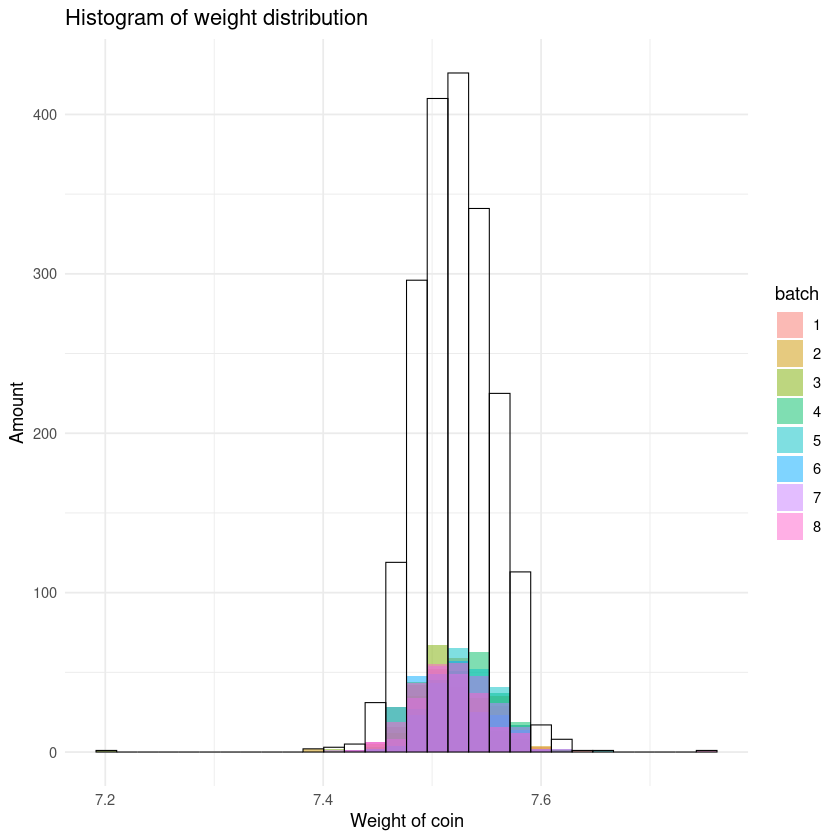

In [98]:
library(ggplot2)

# Создаем гистограмму с количеством минут по гендеру
ggplot(euroweight, aes(x = weight, fill = batch)) +
    geom_histogram(aes(y = after_stat(count)), position = "identity", alpha = 0.5) +  # Гистограмма по гендеру
    geom_histogram(aes(y = after_stat(count)), color = "black", linewidth = 0.3, 
                   fill = NA,data = euroweight) +  # Общая гистограмма
    labs(title = "Histogram of weight distribution",
         x = "Weight of coin",
         y = "Amount") +
    theme_minimal()


### 2. Shapiro test

In [43]:
shapiro.test(euroweight$weight)


	Shapiro-Wilk normality test

data:  euroweight$weight
W = 0.97547, p-value < 2.2e-16


In [113]:
# Используем dplyr и purrr для группового тестирования
library(dplyr)
library(purrr)

results <- euroweight %>% 
group_by(batch) %>%  # Группируем по фактору
summarise(
    shapiro_test = list(shapiro.test(weight)),  # Применяем тест к каждой группе (список списков)
    p_value = sapply(shapiro_test, function(x) x$p.value),# Извлекаем p-value из каждого результата
    statistic = map_dbl(shapiro_test, ~ .x$statistic)
)


print(results)

# A tibble: 8 × 4
  batch shapiro_test  p_value statistic
  <fct> <list>          <dbl>     <dbl>
1 1     <htest>      6.83e- 1     0.996
2 2     <htest>      1.22e- 1     0.991
3 3     <htest>      4.09e-14     0.863
4 4     <htest>      6.83e- 1     0.996
5 5     <htest>      1.29e- 1     0.991
6 6     <htest>      6.76e- 3     0.984
7 7     <htest>      1.12e- 1     0.991
8 8     <htest>      6.83e- 9     0.937


### 3. Kolmogorov - Smirnov test

In [ ]:
ks.test(jitter(euroweight$weight), 'pnorm', mean(euroweight$weight), sd(euroweight$weight) )





	Asymptotic one-sample Kolmogorov-Smirnov test

data:  jitter(euroweight$weight)
D = 0.021153, p-value = 0.3325
alternative hypothesis: two-sided


## Test the hypotheses that the mean of the weight of coins is the same in different packages.


In [116]:

pairwise.t.test(
    euroweight$weight, # зависимая перменная
    euroweight$batch, # группирующая переменная
    p.adjust.method = "holm")



	Pairwise comparisons using t tests with pooled SD 

data:  euroweight$weight and euroweight$batch 

  1       2       3       4       5       6       7      
2 1.00000 -       -       -       -       -       -      
3 0.01455 0.00014 -       -       -       -       -      
4 0.00285 0.11938 3.2e-11 -       -       -       -      
5 0.00203 0.10225 1.7e-11 1.00000 -       -       -      
6 1.00000 0.11938 0.47138 3.9e-06 2.4e-06 -       -      
7 1.00000 1.00000 0.00017 0.11019 0.09317 0.11942 -      
8 1.00000 0.32960 0.18828 4.6e-05 3.0e-05 1.00000 0.33590

P value adjustment method: holm 

# Iris
---------------------------------------------------------------
Attribute Information:
   1. sepal length in cm
   2. sepal (чашелистик) width in cm
   3. petal (лепесток) length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
--------------------------------------------------------------
3. For dataset “iris.txt” (read description in file “iris_description.txt’):
   - Test the normality of length of flowers grouping them by the type of iris.
   - Test the hypotheses about similarity of distributions of characteristics of flowers of different types.
   - Test the hypotheses if the means and variances of the characteristics of flowers of different types are equal.


In [123]:
file_path <- "../data/iris.txt"
iris = read.table(file_path,  sep = ",", fill = TRUE )

# fill = True -- na в пустые колонки

# Задание названий столбцов
colnames(iris) <- c("sepal_length", "sepal_width", "petal_length", "petal_width", "class")
iris$class = factor(iris$class)



head(iris, 3)
tail(iris, 2)

,sepal_length,sepal_width,petal_length,petal_width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


## Test the normality of length of flowers grouping them by the type of iris.


In [124]:
# Используем dplyr и purrr для группового тестирования
library(dplyr)
library(purrr)

results <- iris %>% 
group_by(class) %>%  # Группируем по фактору
summarise(
    shapiro_test = list(shapiro.test(sepal_length)),  # Применяем тест к каждой группе (список списков)
    p_value = sapply(shapiro_test, function(x) x$p.value),# Извлекаем p-value из каждого результата
    statistic = map_dbl(shapiro_test, ~ .x$statistic)
)


print(results)

# A tibble: 3 × 4
  class           shapiro_test p_value statistic
  <fct>           <list>         <dbl>     <dbl>
1 Iris-setosa     <htest>        0.460     0.978
2 Iris-versicolor <htest>        0.465     0.978
3 Iris-virginica  <htest>        0.258     0.971


## Test the hypotheses about similarity of distributions of characteristics of flowers of different types.


In [139]:
pairwise.wilcox.test(
    iris$sepal_length,
    iris$class)

pairwise.wilcox.test(
    iris$petal_length,
    iris$class)

pairwise.wilcox.test(
    iris$sepal_width,
    iris$class)

pairwise.wilcox.test(
    iris$petal_width,
    iris$class)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  iris$sepal_length and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor 1.7e-13     -              
Iris-virginica  < 2e-16     5.9e-07        

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  iris$petal_length and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor <2e-16      -              
Iris-virginica  <2e-16      <2e-16         

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  iris$sepal_width and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor 9.0e-13     -              
Iris-virginica  2.4e-08     0.0046         

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  iris$petal_width and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor <2e-16      -              
Iris-virginica  <2e-16      <2e-16         

P value adjustment method: holm 

## Test the hypotheses if the means and variances of the characteristics of flowers of different types are equal.

In [151]:
fligner.test(iris$sepal_length ~ iris$class)

pairwise.t.test(
    iris$sepal_length, 
    iris$class,
    var.equal = FALSE)



	Fligner-Killeen test of homogeneity of variances

data:  iris$sepal_length by iris$class
Fligner-Killeen:med chi-squared = 11.618, df = 2, p-value = 0.003



	Pairwise comparisons using t tests with pooled SD 

data:  iris$sepal_length and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor 1.8e-15     -              
Iris-virginica  < 2e-16     2.8e-09        

P value adjustment method: holm 

In [150]:
fligner.test(iris$sepal_width ~ iris$class)

pairwise.t.test(
    iris$sepal_width, 
    iris$class,
    var.equal = FALSE)



	Fligner-Killeen test of homogeneity of variances

data:  iris$sepal_width by iris$class
Fligner-Killeen:med chi-squared = 1.0138, df = 2, p-value = 0.6023



	Pairwise comparisons using t tests with pooled SD 

data:  iris$sepal_width and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor < 2e-16     -              
Iris-virginica  2.1e-09     0.0032         

P value adjustment method: holm 

In [153]:
fligner.test(iris$petal_length ~ iris$class)

pairwise.t.test(
    iris$petal_length, 
    iris$class,
    var.equal = FALSE)



	Fligner-Killeen test of homogeneity of variances

data:  iris$petal_length by iris$class
Fligner-Killeen:med chi-squared = 35.148, df = 2, p-value = 2.332e-08



	Pairwise comparisons using t tests with pooled SD 

data:  iris$petal_length and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor <2e-16      -              
Iris-virginica  <2e-16      <2e-16         

P value adjustment method: holm 

In [154]:
fligner.test(iris$petal_width ~ iris$class)

pairwise.t.test(
    iris$petal_width, 
    iris$class,
    var.equal = FALSE)



	Fligner-Killeen test of homogeneity of variances

data:  iris$petal_width by iris$class
Fligner-Killeen:med chi-squared = 29.025, df = 2, p-value = 4.982e-07



	Pairwise comparisons using t tests with pooled SD 

data:  iris$petal_width and iris$class 

                Iris-setosa Iris-versicolor
Iris-versicolor <2e-16      -              
Iris-virginica  <2e-16      <2e-16         

P value adjustment method: holm 

# Height

----------------------------------------

VARIABLE DESCRIPTION:
- HtFt	- height of football players
- HtBk   - heght of basketball players
_____________________________________
4. For dataset “height.xls”:
   - Test the normality of heights of football and basketball players.
   - Test the equity of means and variances of the heights of football and basketball players.
   - Test if the distributions of the heights of football and basketball players are the same.



In [55]:
library(readxl)

file_path <- "../data/height.xlsx"
height = read_excel(file_path)




head(height, 3)
tail(height, 2)

HtFt,HtBk
<dbl>,<dbl>
6.33,6.08
6.50,6.58
6.50,6.25


HtFt,HtBk
<dbl>,<dbl>
6.50,NA
5.83,NA


## Test the normality of heights of football and basketball players.



	Shapiro-Wilk normality test

data:  height$HtFt
W = 0.93655, p-value = 0.01609


	Shapiro-Wilk normality test

data:  height$HtBk
W = 0.96839, p-value = 0.3197



Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_bin()`).”


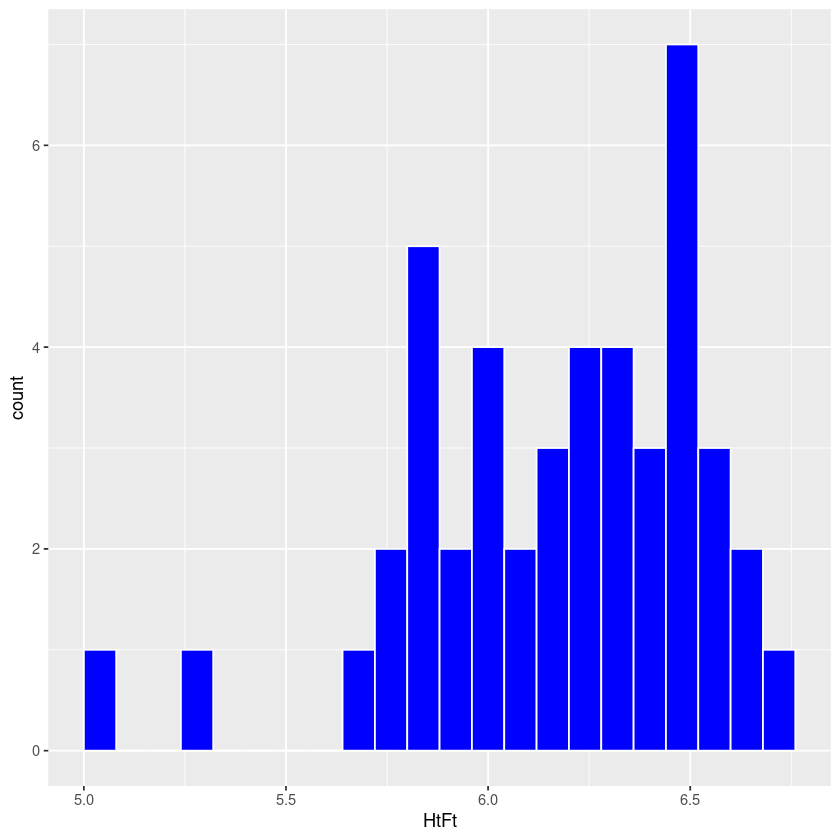

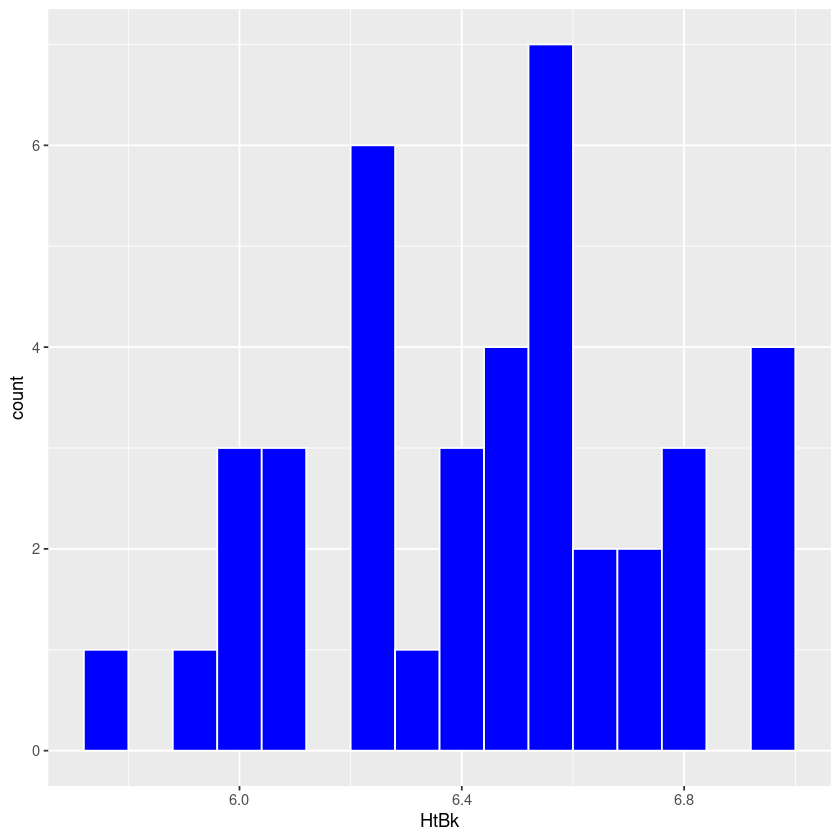

In [77]:
print(shapiro.test(height$HtFt))

print(shapiro.test(height$HtBk))


library(ggplot2)
ggplot(height, aes(x = HtFt))+
    geom_histogram(fill = "blue", col = "white", binwidth = 0.08)
ggplot(height, aes(x = HtBk))+
    geom_histogram(fill = "blue", col = "white", binwidth = 0.08)


## Test the equity of means and variances of the heights of football and basketball players.


In [86]:
# Тест Флигнера-Килена для проверки равенства дисперсий
fligner_test_result <- fligner.test(height$HtFt, height$HtBk)
print(fligner_test_result)

# Т-тест для проверки равенства средних
# Выполнение t-теста, предполагая равенство дисперсий
student_test <- t.test(
    x = height$HtFt,
    y = height$HtBk,
    alternative = "two.sided",  # Двусторонний тест
    mu = 0,                      # Проверяем, равны ли средние
    paired = FALSE,              # Не парный тест
    var.equal = TRUE,           # Предполагаем равенство дисперсий
    conf.level = 0.95           # 95% доверительный интервал
)
print(student_test)



	Fligner-Killeen test of homogeneity of variances

data:  height$HtFt and height$HtBk
Fligner-Killeen:med chi-squared = 10.802, df = 14, p-value = 0.7015




	Two Sample t-test

data:  height$HtFt and height$HtBk
t = -3.6841, df = 83, p-value = 0.0004078
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4224820 -0.1262403
sample estimates:
mean of x mean of y 
 6.178889  6.453250 



## Test if the distributions of the heights of football and basketball players are the same.

In [132]:
wilcox_test = wilcox.test(jitter(height$HtFt),jitter(height$HtBk))
print(wilcox_test)


	Wilcoxon rank sum exact test

data:  jitter(height$HtFt) and jitter(height$HtBk)
W = 513, p-value = 0.0005413
alternative hypothesis: true location shift is not equal to 0



# Surgery

5. For dataset “sugery.xlsx”:
   - Test the hypothesis that the operation is successful with probability 0.7. By success we mean that “V right” before operation is less than “V right” after operation and at the same time “V left” before operation is less than “V left” after operation.


In [ ]:
library(readxl)

file_path <- "../data/surgery.xlsx"
surgery = read_excel(file_path)

surgery = na.omit(surgery)# оставим только завершенные строки


head(surgery, 3)
tail(surgery, 2)

Before V right,Before V left,After V right,After V left
<dbl>,<dbl>,<dbl>,<dbl>
7.2,6.7,12.0,13.1
1.2,1.2,4.5,4.2
6.7,7.3,15.3,14.9


Before V right,Before V left,After V right,After V left
<dbl>,<dbl>,<dbl>,<dbl>
11.7,8.3,11.7,9.3
11.4,11.5,14.8,16.3


## Test the hypothesis that the operation is successful with probability 0.7. <- Binomial test
By success we mean that “V right” before operation is less than “V right” after operation and at the same time “V left” before operation is less than “V left” after operation.

H0: $p=p_0 , p_0=0.7$

H1: $p=p_1 , p_1\neq0.7$

(depends on $\hat{p}$:

[V_left_(before sugery) < V_left_(after sugery)] +

[V_right_(before sugery) < V_right_(after sugery)] =

= success = $\hat{p}$)

1. count success cases
2. count all cases


In [161]:
temp = 
    sugery$`Before V right` < sugery$`After V right` & 
    sugery$`Before V left` < sugery$`After V left`

as.data.frame(table(temp)) # success and not success cases

temp,Freq
<fct>,<int>
FALSE,18
TRUE,69


In [160]:
binom.test(
    x = 69, # количество успешных собыйтий из общего числа испытаний
    n = 87, # общее количество испытаний
    p = 0.7 # гипотетическая вероятность успеха
    )



	Exact binomial test

data:  69 and 87
number of successes = 69, number of trials = 87, p-value = 0.06129
alternative hypothesis: true probability of success is not equal to 0.7
95 percent confidence interval:
 0.6928684 0.8725251
sample estimates:
probability of success 
             0.7931034 
